In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read/print out data

df = pd.read_csv('cardio_train.csv')
df

,id,y_age,d_age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,22431,1,163,72.0,135,80,1,2,0,0,0,1


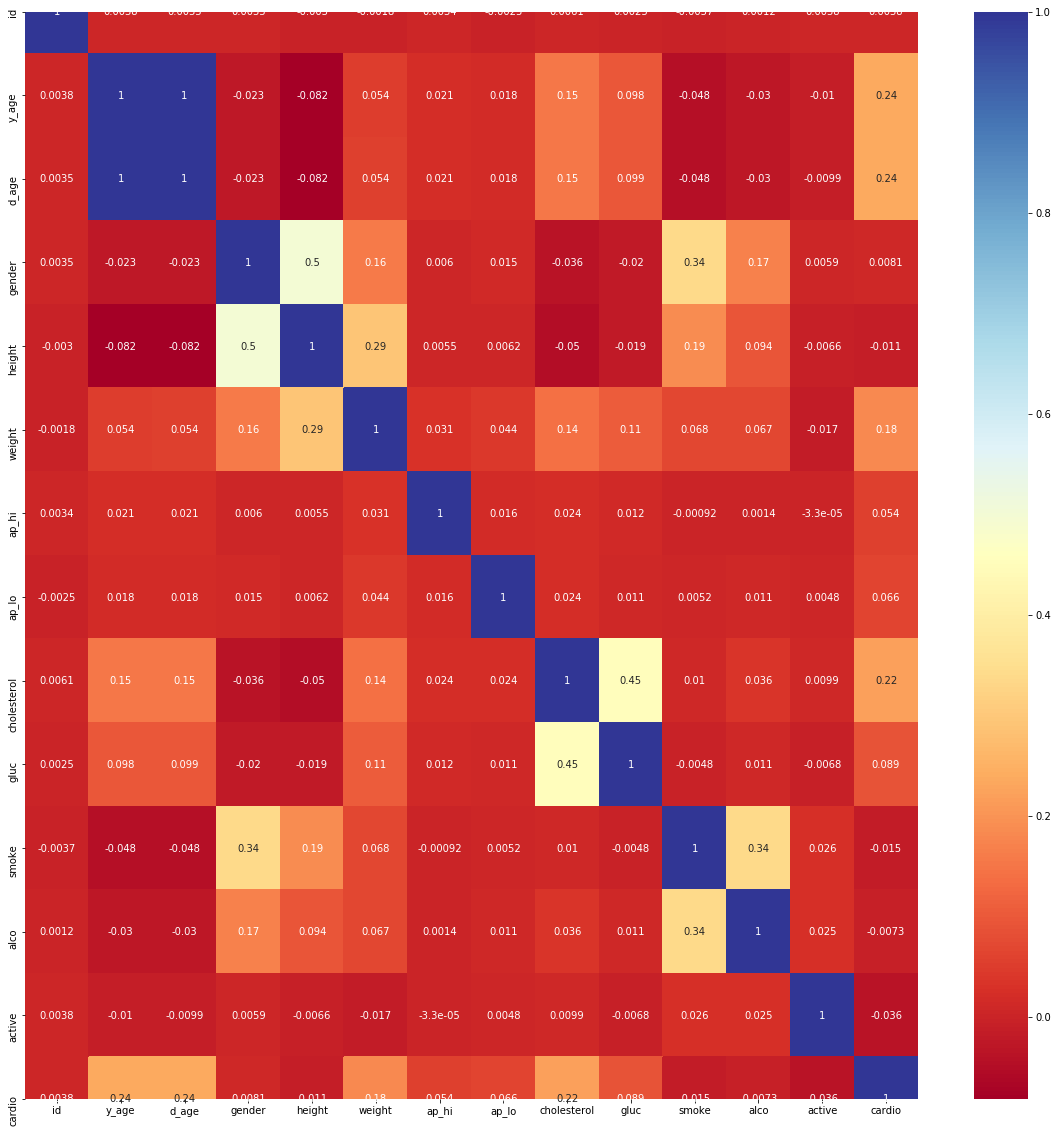

In [11]:
correspond_mat = df.corr()
top_correspond_features = correspond_mat.index
plt.figure(figsize = (20, 20))

x = sns.heatmap(df[top_correspond_features].corr(), annot=True, cmap="RdYlBu")
plt.show()


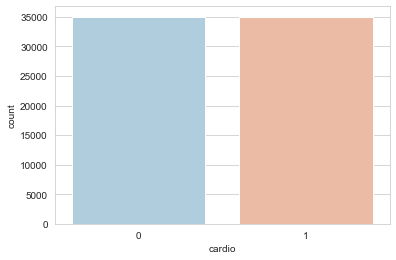

In [12]:
# check if target classes approx. same size

sns.set_style('whitegrid')
sns.countplot(x='cardio',data=df,palette='RdBu_r')
plt.show()

In [13]:
dataset = pd.get_dummies(df, columns = ['d_age', 'gender', 'height', 'weight', 'gluc'])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['y_age', 'ap_hi', 'ap_lo', 'cholesterol', 'smoke', 'alco', 'active']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,id,y_age,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio,d_age_10798,...,weight_175.0,weight_177.0,weight_178.0,weight_180.0,weight_181.0,weight_183.0,weight_200.0,gluc_1,gluc_2,gluc_3
0,0,-0.419800,-0.122182,-0.088238,-0.539322,-0.310879,-0.238384,0.494167,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.319110,0.072610,-0.035180,2.400793,-0.310879,-0.238384,0.494167,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.272018,0.007679,-0.141297,2.400793,-0.310879,-0.238384,-2.023607,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,-0.715364,0.137541,0.017879,-0.539322,-0.310879,-0.238384,0.494167,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,-0.863146,-0.187113,-0.194356,-0.539322,-0.310879,-0.238384,-2.023607,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
y = dataset['cardio']
X = dataset.drop(['cardio'], axis = 1)

In [21]:
from sklearn.model_selection import cross_val_score

kn_scores = []
for k in range(1,10):
    print(k)
    kn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(kn_classifier, X, y, cv=5)
    kn_scores.append(score.mean())


1
2
3
4
5
6
7
8
9


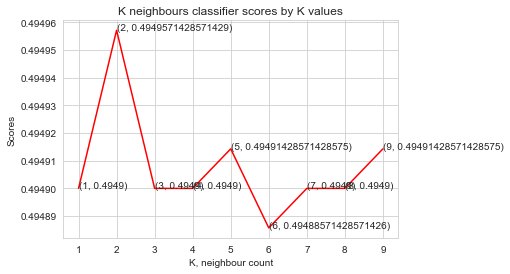

In [23]:
plt.plot([k for k in range(1, 10)], kn_scores, color = 'red')

for i in range(1,10):
    plt.text(i, kn_scores[i-1], (i, kn_scores[i-1]))
    
plt.xticks([i for i in range(1, 10)])

plt.xlabel('K, neighbour count')
plt.ylabel('Scores')
plt.title('K neighbours classifier scores by K values')
plt.show()

In [24]:
kn_classifier = KNeighborsClassifier(n_neighbors = k)
score = cross_val_score(kn_classifier, X, y, cv=5)
score.mean()

0.49491428571428575

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest_classifier = RandomForestClassifier(n_estimators = 10)
score = cross_val_score(randomforest_classifier, X, y, cv=5)
score.mean()